In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
data = pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
data_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [7]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [8]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [9]:
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print()

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
evaluate_model("Linear Regression", y_test, lr_pred)

--- Linear Regression ---
MSE: 33596915.85136148
R² Score: 0.7835929767120722



In [11]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
evaluate_model("Ridge Regression", y_test, ridge_pred)

--- Ridge Regression ---
MSE: 33604956.54337764
R² Score: 0.7835411843918458



In [12]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
evaluate_model("Lasso Regression", y_test, lasso_pred)

--- Lasso Regression ---
MSE: 33596958.06932697
R² Score: 0.7835927047744847



In [13]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)
evaluate_model("Elastic Net Regression", y_test, elastic_pred)

--- Elastic Net Regression ---
MSE: 33642128.61557523
R² Score: 0.7833017487981349



In [14]:
feature_names = X.columns
coef = pd.Series(lasso.coef_, index=feature_names)
important_features = coef[coef != 0].sort_values()
print("Important features from Lasso:\n", important_features)

Important features from Lasso:
 region_southwest    -347.238472
region_southeast    -292.723310
region_northwest    -158.928651
sex_male              -9.284021
children             512.469396
bmi                 2054.869924
age                 3609.140356
smoker_yes          9544.240142
dtype: float64


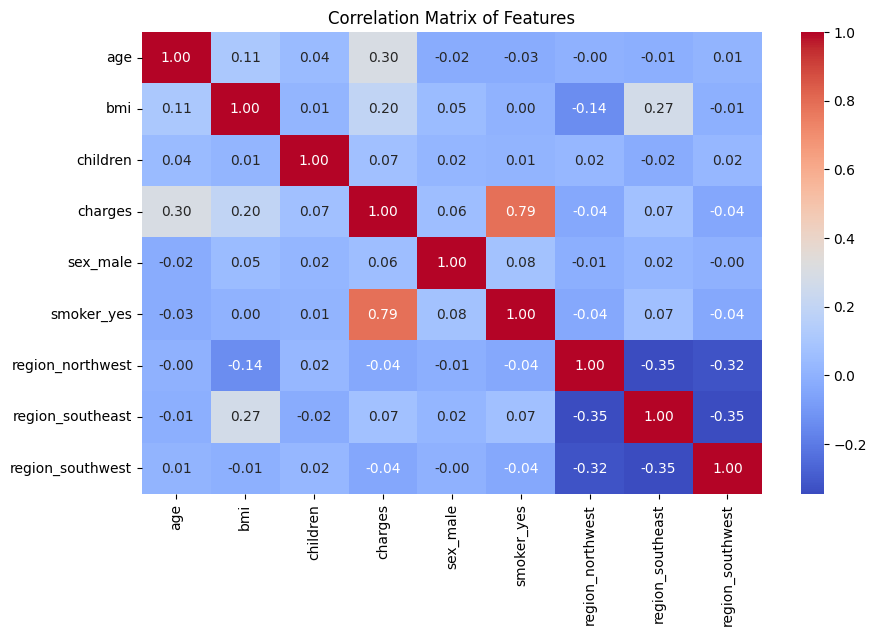

In [22]:
corr_matrix = data_encoded.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

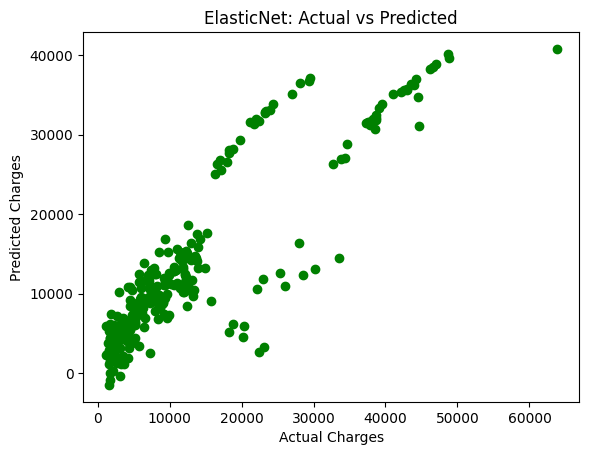

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, elastic_pred , color='green')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("ElasticNet: Actual vs Predicted")
plt.show()


In [17]:
import pickle
with open("linear_model.pkl", "wb") as model_file:
    pickle.dump(lr, model_file)
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
